<a href="https://colab.research.google.com/github/Hamza-t/7-Days-of-Exploratory-Data-Analysis/blob/main/Second_Day_Ford_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ford Stock Data
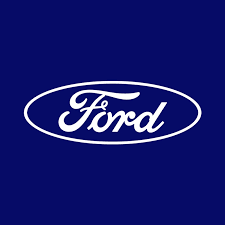
---



##What is Ford?
Ford Motor Company (commonly known as Ford) is an American multinational automobile manufacturer headquartered in Dearborn, Michigan, United States. It was founded by Henry Ford and incorporated on June 16, 1903. The company sells automobiles and commercial vehicles under the Ford brand, and luxury cars under its Lincoln luxury brand. Ford also owns Brazilian SUV manufacturer Troller, an 8% stake in Aston Martin of the United Kingdom and a 32% stake in Jiangling Motors. It also has joint-ventures in China (Changan Ford), Taiwan (Ford Lio Ho), Thailand (AutoAlliance Thailand), Turkey (Ford Otosan), and Russia (Ford Sollers). The company is listed on the New York Stock Exchange and is controlled by the Ford family; they have minority ownership but the majority of the voting power.

##Data Description
This dataset provides the history of daily prices of Ford Motor Company (F). All the column descriptions are provided. Currency is USD.


##DATA INFO ::
###Date : Date of the trading 
###Open : Price from the first transaction of a trading day
###High : Maximum price in a trading day
###Low : Minimum price in a trading day
###Close : Price from the last transaction of a trading day
###Adj Close : Closing price adjusted to reflect the value after accounting for any corporate actions
###Volume : Number of units traded in a day





##Importing Liabraries

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import os
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
import plotly.express as px
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##Data Preparation and Cleaning
###Load the file using Pandas
###Look at some information about the data & the columns
###Fix any missing or incorrect values

In [ ]:
#Connect with Kagle !
path="https://www.kaggle.com/varpit94/ford-stock-data"
od.download(path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hamzarouaissi
Your Kaggle Key: ··········


100%|██████████| 227k/227k [00:00<00:00, 11.0MB/s]

In [ ]:
path_c= "./ford-stock-data"
os.listdir(path_c)

['F.csv']

In [ ]:
#Read the file F.csv
data= pd.read_csv("./ford-stock-data/F.csv")
data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
12428,2021-09-13,12.76,12.99,12.62,12.99,12.99,62270800
12429,2021-09-14,12.93,13.06,12.79,12.86,12.86,47640800
12430,2021-09-15,12.89,13.25,12.81,13.22,13.22,60282100
12431,2021-09-16,13.18,13.53,13.10,13.40,13.40,76426100
12432,2021-09-17,13.41,13.70,13.39,13.55,13.55,76182400
12433,2021-09-20,13.07,13.19,12.63,12.82,12.82,126152200
12434,2021-09-21,12.89,12.97,12.66,12.77,12.77,60473100
12435,2021-09-22,12.92,13.39,12.91,13.23,13.23,75784000
12436,2021-09-23,13.35,13.74,13.32,13.71,13.71,68708100
12437,2021-09-24,13.66,13.94,13.64,13.78,13.78,57290100


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12438 entries, 0 to 12437
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12438 non-null  object 
 1   Open       12438 non-null  float64
 2   High       12438 non-null  float64
 3   Low        12438 non-null  float64
 4   Close      12438 non-null  float64
 5   Adj Close  12438 non-null  float64
 6   Volume     12438 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 680.3+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,1.243800e+04
mean,9.265754,9.382567,9.138992,9.259339,5.359546,2.129446e+07
std,7.061066,7.160028,6.962678,7.057937,4.558708,2.996994e+07
min,0.000000,0.648804,0.638667,0.643736,0.141868,2.990110e+05
25%,2.585080,2.615493,2.540728,2.577477,0.695269,4.309499e+06
50%,8.839347,8.940000,8.738025,8.838694,4.713356,8.743347e+06
75%,12.450000,12.570000,12.300000,12.430000,8.973226,2.903842e+07
max,36.819485,37.300335,35.720394,36.647751,18.928154,5.411756e+08


In [ ]:
print(data.isna().sum().sort_values(ascending=False))

Volume       0
Adj Close    0
Close        0
Low          0
High         0
Open         0
Date         0
dtype: int64


yeyyy!!!  no missing values to work on 
There is a null values in open columns , we can represent them with a null transaction or a cancled one .

##Data Analysis

Question 1 : what is the best year of trading ?

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,2.173495,2.149165,2.153220,0.277406,1091238
1,1972-06-02,2.153220,2.173495,2.141055,2.149165,0.276884,1174468
2,1972-06-05,2.149165,2.169440,2.141055,2.149165,0.276884,5209582
3,1972-06-06,2.149165,2.157275,2.116725,2.124835,0.273750,1424158
4,1972-06-07,2.124835,2.137000,2.112670,2.112670,0.272182,675088


In [ ]:
data['year'] = pd.DatetimeIndex(data['Date']).year
df=data[['year','Volume']]
df=df.groupby(['year']).sum()
print("The best year of trading is %i" %df['Volume'].idxmax())

The best year of trading is 2010


In [ ]:
plt.figure(figsize = (12,10))
fig= px.bar(df , x=df.index, y=df.Volume ,title="Bar plot representing the Volume per year ",labels={"x":"Year","y":"Volume"})
fig.show()

<Figure size 864x720 with 0 Axes>

Question 2 :what is the best year of selling price ?




In [ ]:
# we can calcul the mean of the low and the high price 
data['price']=(data['High']+data['Low'])*data['Volume']
df=data[['year','price']]
df=df.groupby(['year']).sum()
print("The best year of Selling is %i" %df['price'].idxmax())

The best year of Selling is 2010


In [ ]:
plt.figure(figsize = (12,10))
fig= px.bar(df , x=df.index, y=df.price ,title="Bar plot representing the price per year in USD ",labels={"x":"Year","y":"price"})
fig.show()

<Figure size 864x720 with 0 Axes>

Question 3 : what is the best month of trading ? Selling price ?

In [ ]:
import datetime
data['month'] = pd.DatetimeIndex(data['Date']).month

In [ ]:
df=data[['month','Volume']]
df=df.groupby(['month']).sum()
print("The best month of trading is %s" %datetime.datetime.strptime(str(df['Volume'].idxmax()), "%m").strftime("%B"))

The best month of trading is January


In [ ]:
plt.figure(figsize = (12,10))
fig= px.bar(df , x=df.index, y=df.Volume ,title="Bar plot representing the Volume per month ",labels={"x":"month","y":"Volume"})
fig.show()

<Figure size 864x720 with 0 Axes>

Question 4 : what is the best day of trading ? selling price ?

In [ ]:
data['day'] = pd.DatetimeIndex(data['Date']).day

In [ ]:
df=data[['day','Volume']]
df=df.groupby(['day']).sum()
print("The best day of trading is %i" %df['Volume'].idxmax())

The best day of trading is 1


In [ ]:
plt.figure(figsize = (12,10))
fig= px.bar(df , x=df.index, y=df.Volume ,title="Bar plot representing the Volume per day of the month ",labels={"x":"day","y":"Volume"})
fig.show()

<Figure size 864x720 with 0 Axes>

the fisrt day of the month have the max volume of trading , that may be related with the time of salary 

Question 5 : the evolution of the trading per year ?

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
# Create some mock data
t = np.asarray(list(data["year"].unique()))
#volume
df=data[['year','Volume']]
df1=df.groupby(['year']).sum()
df2=data[['year','price']]
df2=df2.groupby(['year']).sum()
#print(df1)                            #to_be_continued

figsize=(20, 12)
"""
fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, df1, color=color,marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.bar(t, df2, color=color,align='center')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
"""
ax=df2.plot(x="year",kind='bar', ax=ax)
df1.plot(x="year", linestyle='-', marker='o',color="red",ax=ax)


plt.show()


KeyError: ignored